<a href="https://colab.research.google.com/github/Mwaisammy/Colors-Website/blob/master/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market segmentation using K-Means**

# **Data Prepocessing**

##  **Load the data**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
print(df)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


# **EDA (Exploratory Data Analysis)**

Exploratory Data Analysis (EDA) is the process of looking at your dataset to understand what's inside before doing any modeling or advanced analysis.


Steps involved are

1. Load the data.
2. Look at the data - we check the first few rows to understand what we are working with
3. Understand the structure of the data i.e
      * Column name
      * Data types
      * Rows and columns

4. Check for Missing or Duplicate Data
5. Basic Statistics
6. Visualize the Data
7. Spot Trends or Patterns




🧾 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

👀 First 5 Rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

📊 Summary Statistic

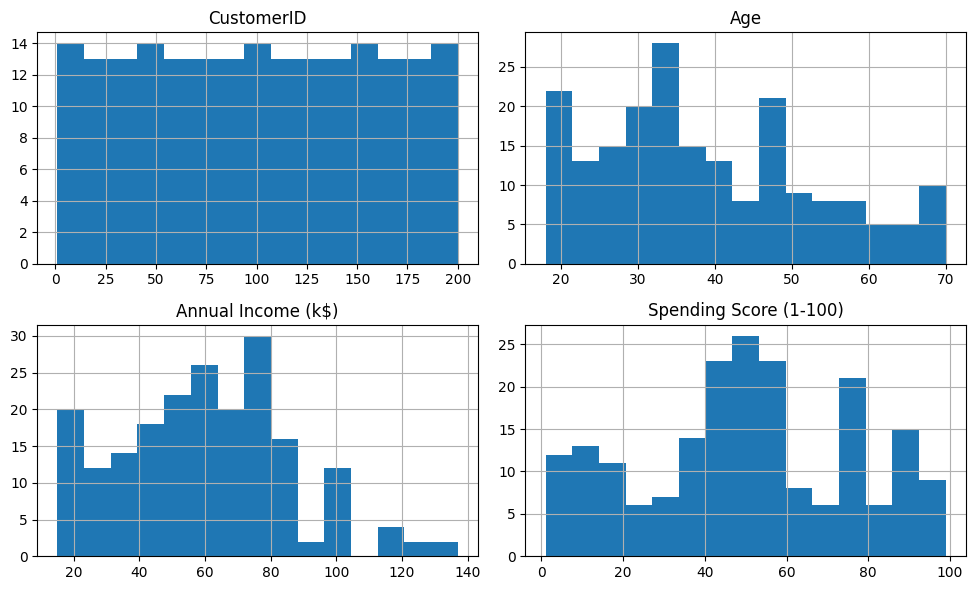


🔥 Correlation Heatmap:


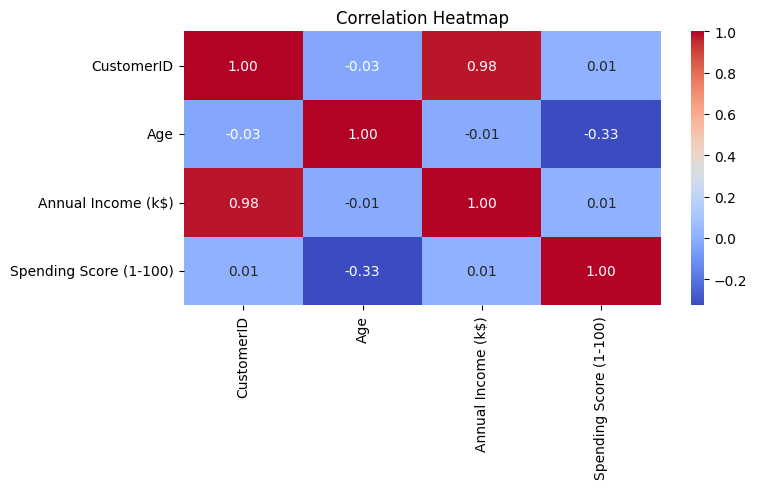

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Mall_Customers.csv')

# 1. Basic Info
print("🧾 Basic Info:")
print(df.info())

# 2. First few rows
print("\n👀 First 5 Rows:")
print(df.head())

# 3. Summary statistics
print("\n📊 Summary Statistics:")
print(df.describe())

# 4. Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())

# 5. Check for duplicates
print("\n📎 Duplicate Rows:")
print(df.duplicated().sum())

# 6. Number of unique values per column
print("\n🔢 Unique Values Per Column:")
print(df.nunique())

# 7. Distribution of numerical columns (if applicable)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

if not numeric_cols.empty:
    print("\n📈 Distribution Plots:")
    df[numeric_cols].hist(bins=15, figsize=(10, 6))
    plt.tight_layout()
    plt.show()

# 8. Time series trend (if 'month_year' exists and price column available)
if 'month_year' in df.columns and 'price' in df.columns:
    print("\n📅 Price Over Time:")
    plt.figure(figsize=(10, 5))
    df.groupby('month_year')['price'].mean().plot(marker='o')
    plt.title('Average Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. Correlation heatmap (optional)
if len(numeric_cols) > 1:
    print("\n🔥 Correlation Heatmap:")
    plt.figure(figsize=(8, 5))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()


# **Methodology**

## **Aggeregate customer-level metrics**

### **Calculate Recency, Frecuency, and Monetary value(RFM) for each customer**

Here we do RFM analysis

1. Recency: Number of days since last purchase.

2. Frequency: Number of transactions, i.e how many times did this customer appear in the dataset?

3. Monetary: Total spending.

In [ ]:
# Rename columns for consistency (optional)
df.rename(columns={
    'CustomerID': 'customer_id',
    'Annual Income (k$)': 'income',
    'Spending Score (1-100)': 'spending_score'
}, inplace=True)

# Simulate RFM scores
rfm = df[['customer_id', 'income', 'spending_score']].copy()

# Assign R, F, M scores from 1 to 5 (higher is better)
rfm['R'] = pd.qcut(df['spending_score'], 5, labels=[5, 4, 3, 2, 1]).astype(int)  # Reverse: higher score = more recent
rfm['F'] = pd.qcut(df['spending_score'], 5, labels=[1, 2, 3, 4, 5]).astype(int)  # Proxy frequency
rfm['M'] = pd.qcut(df['income'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# Combine into RFM Score
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Show result
print(rfm.head())


   customer_id  income  spending_score  R  F  M RFM_Score
0            1      15              39  4  2  1       421
1            2      15              81  1  5  1       151
2            3      16               6  5  1  1       511
3            4      16              77  1  5  1       151
4            5      17              40  4  2  1       421


In [ ]:
print(rfm)

     customer_id  income  spending_score  R  F  M RFM_Score
0              1      15              39  4  2  1       421
1              2      15              81  1  5  1       151
2              3      16               6  5  1  1       511
3              4      16              77  1  5  1       151
4              5      17              40  4  2  1       421
..           ...     ...             ... .. .. ..       ...
195          196     120              79  1  5  5       155
196          197     126              28  4  2  5       425
197          198     126              74  2  4  5       245
198          199     137              18  5  1  5       515
199          200     137              83  1  5  5       155

[200 rows x 7 columns]


# **Feature scaling**

Scaling means adjusting your data so that all the features (columns) are on the same range or scale.





## **Normalize the RFM values for clustering**

**You have three features: recency, frequency, and monetary.**

Each of them may have very different ranges:
1. Recency might range from 1 to 300 (days),
2. Frequency might range from 1 to 50 (number of purchases),
3. Monetary might range from 100 to 50,000 (total money spent).

In [ ]:
# Using 'spending_score' as proxy for Recency and Frequency, and 'income' for Monetary
rfm = df[['customer_id', 'income', 'spending_score']].copy()
rfm['recency'] = pd.qcut(df['spending_score'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['frequency'] = pd.qcut(df['spending_score'], 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['monetary'] = pd.qcut(df['income'], 5, labels=[1, 2, 3, 4, 5]).astype(int)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to recency, frequency, monetary
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

# Convert back to DataFrame for readability (optional)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['recency_scaled', 'frequency_scaled', 'monetary_scaled'])

# Concatenate with customer_id if needed
rfm_scaled_df = pd.concat([rfm[['customer_id']], rfm_scaled_df], axis=1)

# Display result
print(rfm_scaled_df.head())


   customer_id  recency_scaled  frequency_scaled  monetary_scaled
0            1        0.693889         -0.693889        -1.379598
1            2       -1.441153          1.441153        -1.379598
2            3        1.405569         -1.405569        -1.379598
3            4       -1.441153          1.441153        -1.379598
4            5        0.693889         -0.693889        -1.379598


In [ ]:
print(rfm_scaled)

[[ 0.69388867 -0.69388867 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 0.69388867 -0.69388867 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-0.7294727   0.7294727  -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 0.69388867 -0.69388867 -1.37959767]
 [-0.7294727   0.7294727  -1.37959767]
 [ 0.69388867 -0.69388867 -1.37959767]
 [-1.44115338  1.44115338 -1.37959767]
 [ 0.69388867 -0.69388867 -1.37959767]
 [-0.7294727   0.7294727  -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-0.7294727   0.7294727  -1.37959767]
 [ 1.40556935 -1.40556935 -1.37959767]
 [-1.44115338  1.44115338

# **Model building**

## **Clustering (K - Means Example)**

### **Clustering using elbow method**

The Elbow Method helps you pick the right number of groups by showing when adding more groups doesn’t really help much anymore


The Elbow Method helps you find the best number of clusters (k) to use in KMeans.

It works by checking how well the model fits for different values of k (clusters), using something called SSE (Sum of Squared Errors).

In [ ]:
from sklearn.cluster import KMeans

#Find optimal clusters using the Elbow Method

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)


#Plot Elbow curve (not shown here; typially k=3 or 4 works for RFM)

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] =  kmeans.fit_predict(rfm_scaled)

In [ ]:
print(rfm['cluster'] )

0      2
1      0
2      2
3      0
4      2
      ..
195    1
196    3
197    1
198    3
199    1
Name: cluster, Length: 200, dtype: int32


##**Plot to visually determine the optimal number of clusters**

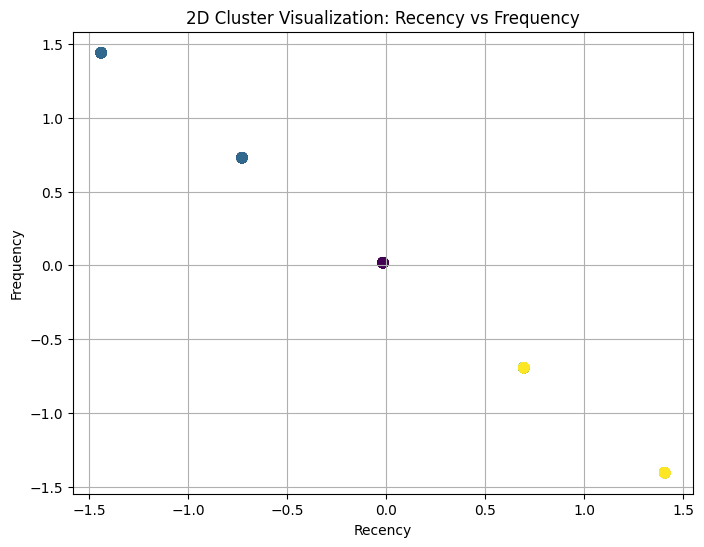

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Fit KMeans with k=4 (if not already done)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# 2D Plot: Recency vs Frequency
plt.figure(figsize=(8, 6))
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=rfm['cluster'], cmap='viridis', s=50)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('2D Cluster Visualization: Recency vs Frequency')
plt.grid(True)
plt.show()



**How to Read the Plot:**

1. X-axis (Recency)

* Left side = customers who came back recently

* Right side = customers who haven’t come back in a while

2. Y-axis (Frequency)

* Top = customers who visit or shop often

* Bottom = customers who visit rarely

3. Colors (Clusters)

* Each color shows a different group of similar customers

* The model grouped them based on how recently and how often they shop

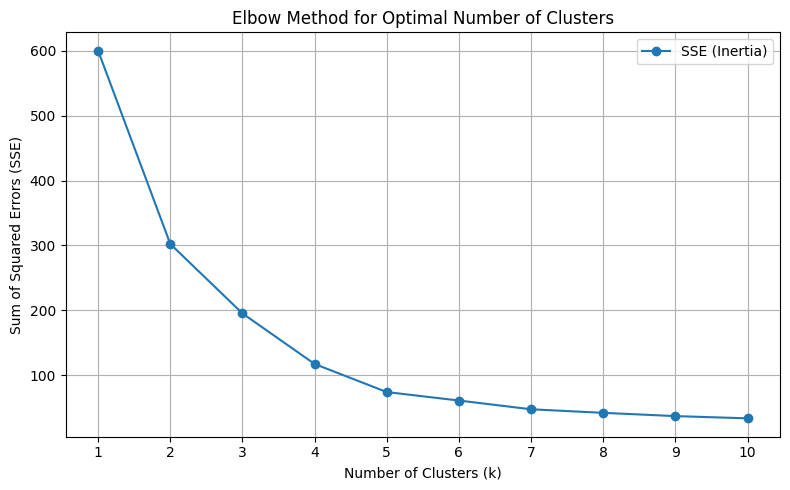

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of clusters
k_values = range(1, 11)

# Compute SSE for each k
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Optional: Uncomment this if you want to automatically find the elbow
# from kneed import KneeLocator
# kl = KneeLocator(k_values, sse, curve='convex', direction='decreasing')
# elbow_k = kl.elbow

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', label='SSE (Inertia)')

# Optional: Show the elbow point
# plt.axvline(x=elbow_k, color='red', linestyle='--', label=f'Elbow at k={elbow_k}')

# Add titles and labels
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.legend()  # 👈 Adds the key/legend
plt.tight_layout()
plt.show()


# **Analyse Segments**

## **Cluster characteristics**

This code summarizes the behavior of each customer group so you can understand who they are and what actions to take.

In [ ]:
cluster_summary = rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary' : ['mean', 'count']
}).reset_index()


In [ ]:
print(cluster_summary)

  cluster   recency frequency  monetary      
               mean      mean      mean count
0       0  2.362500  3.637500  2.062500    80
1       1  1.375000  4.625000  4.500000    40
2       2  4.309524  1.690476  1.785714    42
3       3  4.736842  1.263158  4.526316    38


# **Assign Segment Labels**

## **Map cluster labels to meaningful names**

### **Typical RFM Segment labels**

1. Champions : Recently purchased, buy often, spend a lot
2. Loyal customers: Buy often, not necessarily recent
3. At risk: Used to but ofter, but not recently
4. New customers: Recent buyers, low frequency

In [ ]:
# Map cluster labels to meaningful names
cluster_labels = {
    0: 'Champions',
    1: 'Loyal Customers',
    2: 'At Risk',
    3: 'New Customers'
}

rfm['segment'] = rfm['cluster'].map(cluster_labels)


# **Visualization**

### **Visualization of customer Segments on 2D RFM Clusters**

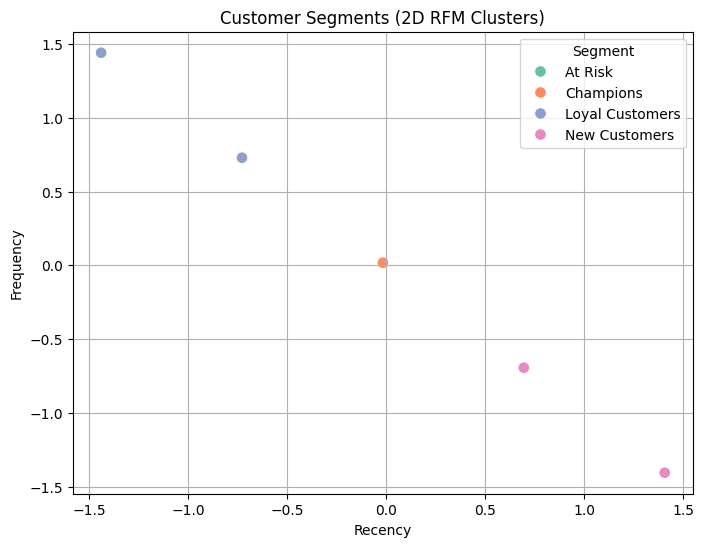

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_scaled[:, 0], y=rfm_scaled[:, 1], hue=rfm['segment'], palette='Set2', s=70)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segments (2D RFM Clusters)')
plt.legend(title='Segment')
plt.grid(True)
plt.show()


Details of the key above

1. At risk: Used to but ofter, but not recently
2. Champions : Recently purchased, buy often, spend a lot
3. New customers: Recent buyers, low frequency
4. Loyal customers: Buy often, not necessarily recent